<a href="https://colab.research.google.com/github/sobieddch90/mcd_udg_tfm-egg_analysis/blob/main/EEG%20Data%20Analysis/Alzheimer_Open_Neuro_EEG_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alzheimer EEG Analysis

- Author: Elmo Chavez
- Date:   05-Jun-2023

**Dataset Description**
> description here

Source Dataset: [Open Neuro: Alzheimer's disease, Frontotemporal dementia and Healthy subjects](https://openneuro.org/datasets/ds004504/versions/1.0.5)

**Workshop**
> description here



---

## Libraries

**openneuro-py** 
> A Python client for accessing OpenNeuro datasets.
> https://pypi.org/project/openneuro-py/

**mne**
> Open-source Python package for exploring, visualizing, and analyzing human neurophysiological data: MEG, EEG, sEEG, ECoG, NIRS, and more.
> https://mne.tools/stable/index.html

In [1]:
!pip install openneuro-py
!pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00


## Read and Explore the Data

Downloading the dataset directly from the website using openneuro package.

**PD**: *running the download command may take around 2 minutes or more.*

In [3]:
!mkdir /content/alzheimer_dataset

In [4]:
import openneuro as on

dataset_id = "ds004504"
output_dir = "/content/alzheimer_dataset"

on.download(dataset=dataset_id, target_dir=output_dir)


👋 Hello! This is openneuro-py 2022.4.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds004504 …


📁 Traversing directories for ds004504 : 0 entities [00:00, ? entities/s]

  Request timed out while fetching metadata, retrying …


/usr/local/lib/python3.10/dist-packages/openneuro/_download.py:203: RuntimeWarning: coroutine 'sleep' was never awaited
  asyncio.sleep(retry_backoff)


📥 Retrieving up to 713 files (5 concurrent downloads). 
✅ Finished downloading ds004504.
 
🧠 Please enjoy your brains.
 


In [20]:
import mne
import os

path = os.getcwd()+'/alzheimer_dataset/derivatives/sub-001/eeg/'
filename = 'sub-001_task-eyesclosed_eeg.set'

der_sub_001 = mne.io.read_raw_eeglab(path+filename)
der_sub_001

<ipython-input-20-c2f4375f8035>:7: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  der_sub_001 = mne.io.read_raw_eeglab(path+filename)


<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MB, data loaded>

In [15]:
path = os.getcwd()+'/alzheimer_dataset/sub-001/eeg/'
filename = 'sub-001_task-eyesclosed_eeg.set'

sub_001 = mne.io.read_raw_eeglab(path+filename)
sub_001

<ipython-input-15-19b8ef2a0c84>:4: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  sub_001 = mne.io.read_raw_eeglab(path+filename)


<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MB, data loaded>

### Comparison between Preprocessed and Unprocessed data

The unprocessed EEG recordings are included in folders named: sub-0XX. Folders named sub-0XX in the subfolder derivatives contain the preprocessed and denoised EEG recordings. The preprocessing pipeline of the EEG signals is as follows. First, a Butterworth band-pass filter 0.5-45 Hz was applied and the signals were re-referenced to A1-A2

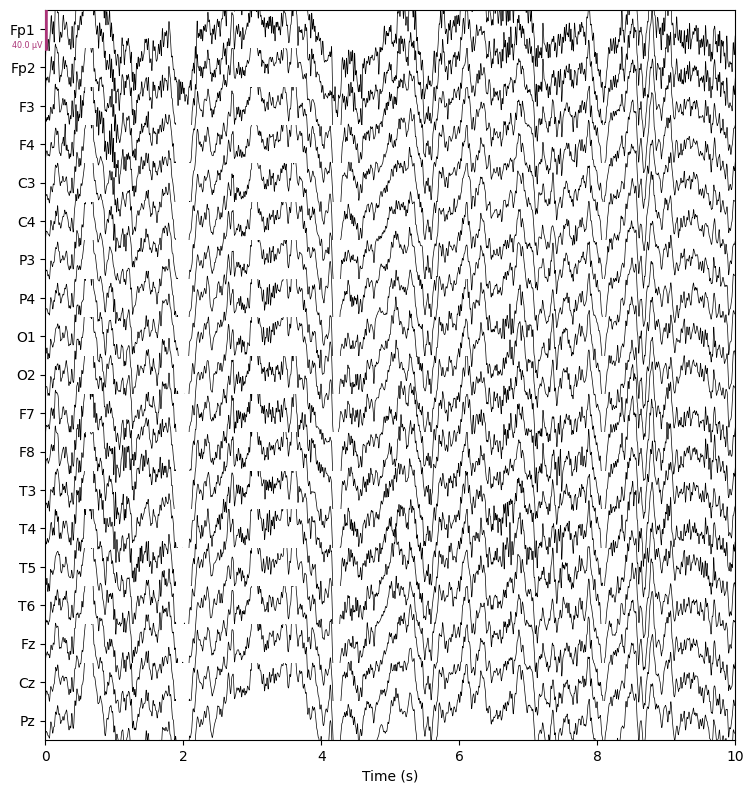

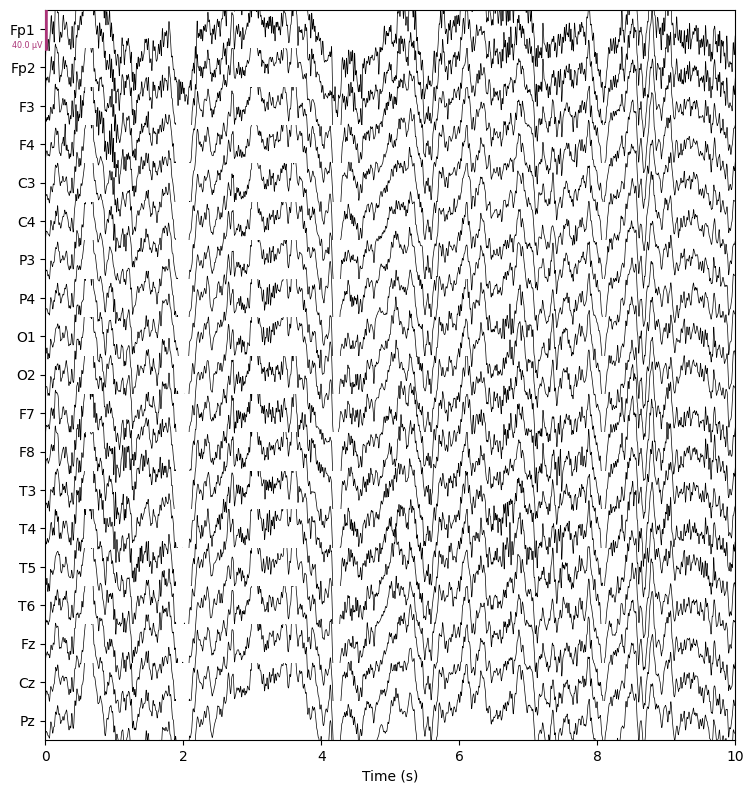

In [17]:
der_sub_001.plot(show_scrollbars=False, show_scalebars=True)

Using matplotlib as 2D backend.


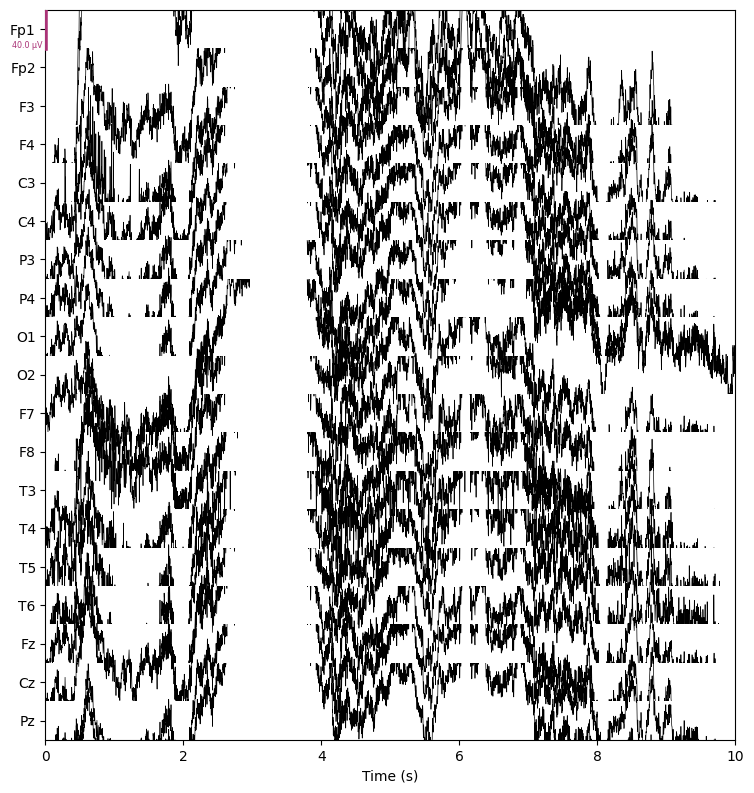

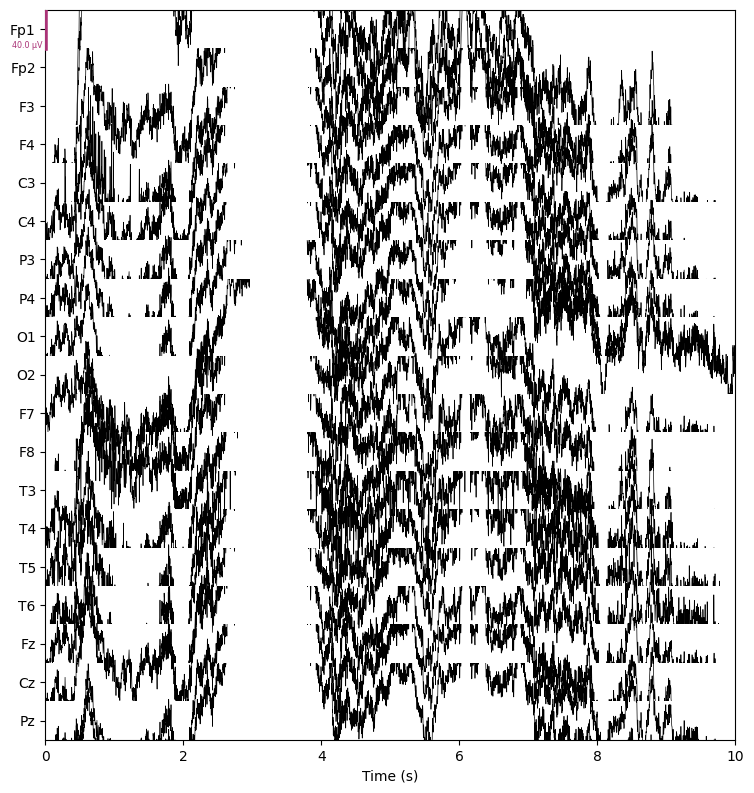

In [16]:
sub_001.plot(show_scrollbars=False, show_scalebars=True)

In [22]:
der_sub_001.ch_names

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T3',
 'T4',
 'T5',
 'T6',
 'Fz',
 'Cz',
 'Pz']

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


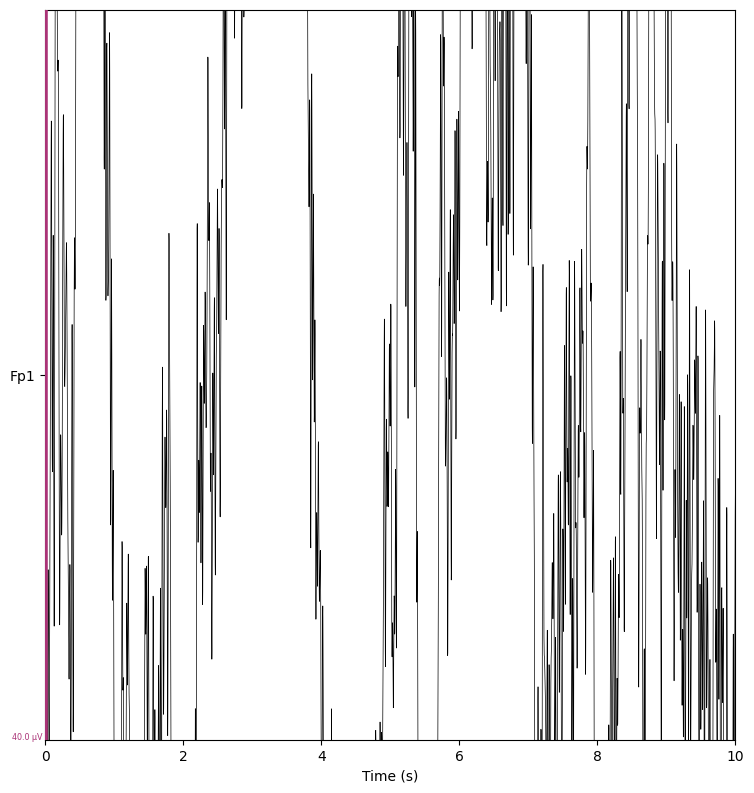

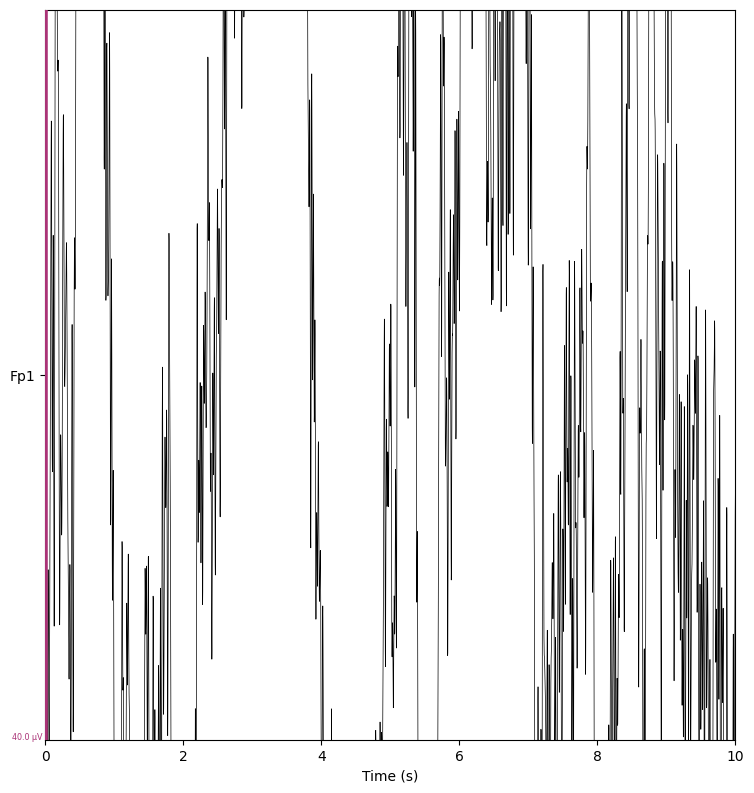

In [18]:
list_channels = ['Fp1']

# Running the following code will plot the channels previously pre-selected in the list_channels variable, 
# in addition to this, will filter these channels in the EEG object.

#der_sub_001.pick_channels(list_channels).plot(show_scrollbars=False, show_scalebars=True)

Effective window size : 4.096 (s)


<ipython-input-26-909683d0f19a>:1: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  der_sub_001.compute_psd().plot()


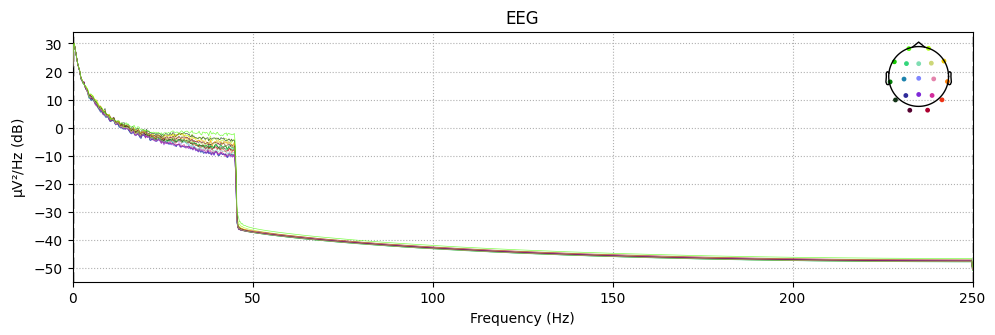

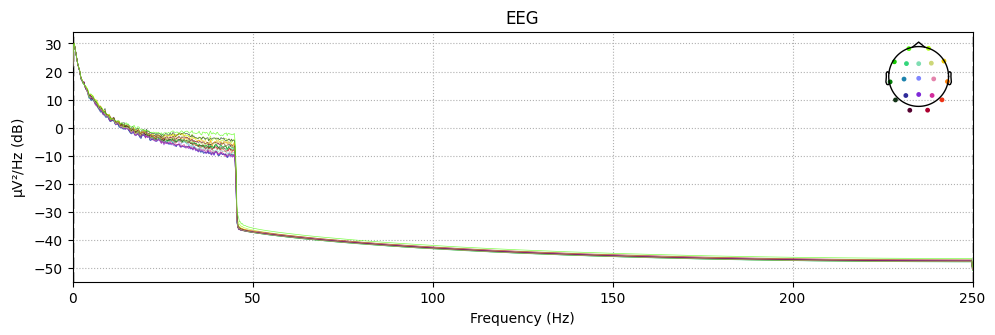

In [26]:
der_sub_001.compute_psd().plot()

Effective window size : 4.096 (s)


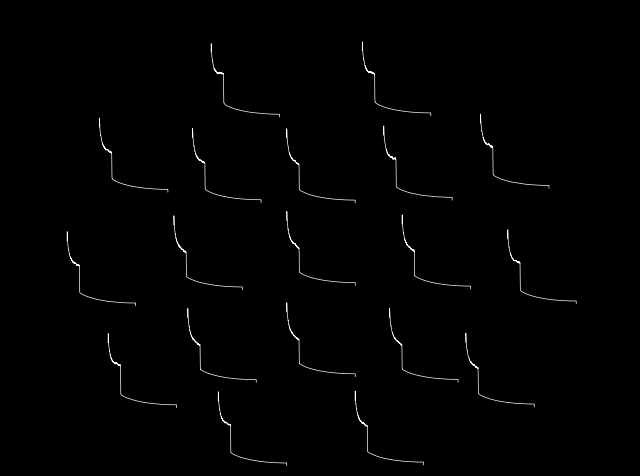

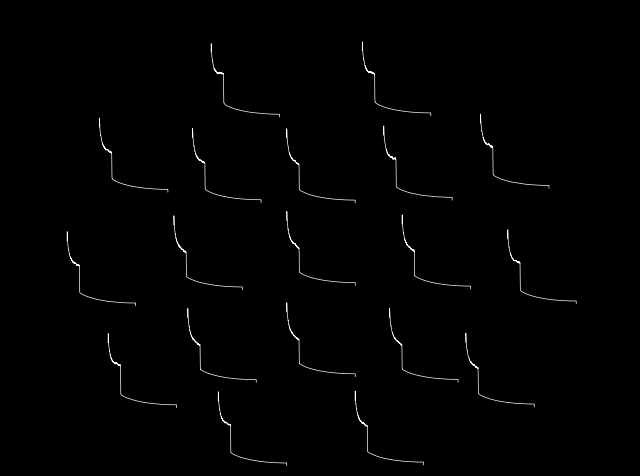

In [28]:
der_sub_001.compute_psd().plot_topo()